# 卷积层

- 对全连接层使用**平移不变性**和**局部性**得到卷积层

In [1]:
import torch
import part_2

In [2]:
X = torch.tensor([[0., 1., 2.], [3., 4., 5.], [6., 7., 8.]])
K = torch.tensor([[0., 1.], [2., 3.]])

part_2.corr2d(X, K)

tensor([[19., 25.],
        [37., 43.]])

## 卷积层的一个简单应用：检测图像中不同颜色的边缘

In [3]:
X = torch.ones((6, 8))
X[:, 2: 6] = 0
X

tensor([[1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.],
        [1., 1., 0., 0., 0., 0., 1., 1.]])

In [4]:
K = torch.tensor([[1., -1.]])

## 输出 `Y` 中的 1 代表从白色到黑色的边缘，-1 代表从黑色到白色的边缘

In [5]:
Y = part_2.corr2d(X, K)
Y

tensor([[ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.],
        [ 0.,  1.,  0.,  0.,  0., -1.,  0.]])

## 卷积核 `K` 只可以检测垂直边缘

In [6]:
part_2.corr2d(X.t(), K)

tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]])

## 学习由 `X` 生成 `Y` 的卷积核

In [8]:
conv2d = torch.nn.Conv2d(1, 1, kernel_size=(1, 2), bias=False)

X = X.reshape((1, 1, 6, 8))
Y = Y.reshape((1, 1, 6, 7))

for i in range(10):
    Y_hat = conv2d(X)
    l = (Y_hat - Y) ** 2 # mse 损失函数
    conv2d.zero_grad()
    l.sum().backward()
    conv2d.weight.data[:] -= 3e-2 * conv2d.weight.grad # 小批量随机梯度下降法
    if (i + 1) % 2 == 0:
        print(f"batch {i + 1}, loss {l.sum():.3f}")

batch 2, loss 8.134
batch 4, loss 2.737
batch 6, loss 1.022
batch 8, loss 0.402
batch 10, loss 0.162


## 所学的卷积核的权重张量

In [9]:
conv2d.weight.data.reshape((1, 2))

tensor([[ 0.9506, -1.0331]])

# 填充和步长

### 步长

步长是指行/列的滑动步长

In [1]:
import torch
import part_2

conv2d = torch.nn.Conv2d(1, 1, kernel_size=3, padding=1)
X = torch.rand(size=(8, 8))
part_2.comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

### 填充不同高度和宽度

In [2]:
conv2d = torch.nn.Conv2d(1, 1, kernel_size=(5, 3), padding=(
    2, # 上下填充两行
    1) # 左右填充一列
)

part_2.comp_conv2d(conv2d, X).shape

torch.Size([8, 8])

In [ ]:
### 将高度和宽度的步长设置为2

In [3]:
conv2d = torch.nn.Conv2d(1, 1, kernel_size=3, padding=1, stride=2)

part_2.comp_conv2d(conv2d, X).shape

torch.Size([4, 4])

In [ ]:
### 一个稍微复杂的例子

In [5]:
conv2d = torch.nn.Conv2d(1, 1, kernel_size=(3, 5), padding=(0, 1), stride=(3, 4))

part_2.comp_conv2d(conv2d, X).shape

torch.Size([2, 2])

# 多个输入和输出通道

## 多输入通道
- 每个通道都有一个卷积核，结果是所有通道卷积结果的和

## 多输出通道

In [1]:
import torch
import part_2

## 验证互相关运算的输出

In [2]:
X = torch.tensor([[[0.0, 1.0, 2.0], [3.0, 4.0, 5.0], [6.0, 7.0, 8.0]],
                  [[1.0, 2.0, 3.0], [4.0, 5.0, 6.0], [7.0, 8.0, 9.0]]])
K = torch.tensor([[[0.0, 1.0], [2.0, 3.0]], [[1.0, 2.0], [3.0, 4.0]]])

part_2.corr2d_multi_in(X, K)

tensor([[ 56.,  72.],
        [104., 120.]])

In [3]:
K = torch.stack((K, K + 1, K + 2), 0)
K.shape

torch.Size([3, 2, 2, 2])

In [4]:
part_2.corr2d_multi_out(X, K)

tensor([[[ 56.,  72.],
         [104., 120.]],

        [[ 76., 100.],
         [148., 172.]],

        [[ 96., 128.],
         [192., 224.]]])

# 池化层

## 二维最大池化层

- 返回滑动窗口中的最大值

## 二维平均池化层

In [1]:
import torch
import part_2

In [2]:
X = torch.tensor([[0., 1., 2.], [3., 4., 5.], [6., 7., 8.]])
part_2.pool2d(X, (2, 2))

tensor([[4., 5.],
        [7., 8.]])

In [3]:
X = torch.tensor([[0., 1., 2.], [3., 4., 5.], [6., 7., 8.]])
part_2.pool2d(X, (2, 2), 'avg')

tensor([[2., 3.],
        [5., 6.]])

# LeNet

![这是图片](./images/part-2/lenet.jpg)

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
class LeNet_5(nn.Module):

    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5, padding=2)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.sigmoid(self.conv1(x))
        x = self.pool1(x)
        x = F.sigmoid(self.conv2(x))
        x = self.pool2(x)
        x = x.view(-1, 16 * 5 * 5)
        x = F.sigmoid(self.fc1(x))
        x = F.sigmoid(self.fc2(x))
        x = self.fc3(x)
        return x

In [3]:
net = LeNet_5()

In [8]:
net

LeNet_5(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
  (pool1): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (pool2): AvgPool2d(kernel_size=2, stride=2, padding=0)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [4]:
import part_1

batch_size = 256
train_iter, test_iter = part_1.load_data_fashion_mnist(batch_size)

In [5]:
def evaluate_accuracy_gpu(net, data_iter, device=None):
    """使用GPU计算模型在数据集上的精度。"""
    if isinstance(net, torch.nn.Module):
        net.eval()
        if not device:
            device = next(iter(net.parameters())).device
    metric = part_1.Accumulator(2)
    for X, y in data_iter:
        if isinstance(X, list):
            X = [x.to(device) for x in X]
        else:
            X = X.to(device)
        y = y.to(device)
        metric.add(part_1.accuracy(net(X), y), y.numel())
    return metric[0] / metric[1]

In [6]:
def train_ch6(net, train_iter, test_iter, num_epochs, lr, device):
    """用GPU训练模型(在第六章定义)。"""
    def init_weights(m):
        if type(m) == nn.Linear or type(m) == nn.Conv2d:
            nn.init.xavier_uniform_(m.weight)

    net.apply(init_weights)
    print('training on', device)
    net.to(device)
    optimizer = torch.optim.SGD(net.parameters(), lr=lr)
    loss = nn.CrossEntropyLoss()
    animator = part_1.Animator(xlabel='epoch', xlim=[1, num_epochs],
                            legend=['train loss', 'train acc', 'test acc'])
    timer, num_batches = part_1.Timer(), len(train_iter)
    for epoch in range(num_epochs):
        metric = part_1.Accumulator(3)
        net.train()
        for i, (X, y) in enumerate(train_iter):
            timer.start()
            optimizer.zero_grad()
            X, y = X.to(device), y.to(device)
            y_hat = net(X)
            l = loss(y_hat, y)
            l.backward()
            optimizer.step()
            with torch.no_grad():
                metric.add(l * X.shape[0], part_1.accuracy(y_hat, y), X.shape[0])
            timer.stop()
            train_l = metric[0] / metric[2]
            train_acc = metric[1] / metric[2]
            if (i + 1) % (num_batches // 5) == 0 or i == num_batches - 1:
                animator.add(epoch + (i + 1) / num_batches,
                             (train_l, train_acc, None))
        test_acc = evaluate_accuracy_gpu(net, test_iter)
        animator.add(epoch + 1, (None, None, test_acc))
    print(f'loss {train_l:.3f}, train acc {train_acc:.3f}, '
          f'test acc {test_acc:.3f}')
    print(f'{metric[2] * num_epochs / timer.sum():.1f} examples/sec '
          f'on {str(device)}')

loss 0.488, train acc 0.814, test acc 0.814
65025.0 examples/sec on cuda


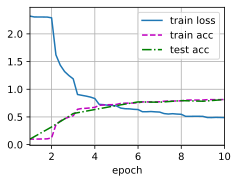

In [7]:
lr, num_epochs = 0.9, 10
train_ch6(net, train_iter, test_iter, num_epochs, lr, 'cuda' if torch.cuda.is_available() else 'cpu')

# AlexNet

![这是图片](./images/part-2/alexnet.png)

# VGG

![这是图片](./images/part-2/vggnet.png)

# NiN

# GoogLeNet

# ResNet